## Data collection:

Our data comes from two sources: Reddit comments and the Covid Tracking Project.  

- Reddit comments

We use the `/comment` endpoint of `pushshift.io API` to search and aggregate comments with desired keywords. We aggregate the search result by day for the last 300 days using attributes `after=300d`, `aggs=created_utc`, and `frequency=day`. We don’t want any comment instances to be returned, so we set `size=0`. We want the data to be returned in ascending, i.e., chronological order, so we add the attribute `sort=asc`. 

The data are returned in JSON format, each containing information about dates (in the format of timestamp) and frequencies. JSON is not very handy to put into pandas DataFrames. Therefore, we wrote a Python script that loads and processes the JSON data in batches and converts the data to csv files with two columns. (The Python script of how we scrape data in JSON formats and convert these JSON formats to CSV files are included in the appendix of this Jupyter notebook.) The first column is the word frequency per day; the second is the date. This processing procedure returns very neat datasets. 

- Covid Tracking Project

There are CSV files available on the website of this project, so we directly download it. 

## Data cleaning:


The idea behind our data cleaning process is to first clean these two sources of data separately. Then we merge them into one DataFrame with `date` as the shared column. Finally, we adjust this combined DataFrame and turn it into our analysis-ready dataset. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

We load csv files to the notebook. 

In [2]:
covid = pd.read_csv("covid.csv")
covid_19 = pd.read_csv("covid-19.csv")
coronavirus = pd.read_csv("coronavirus.csv")
covid_economy = pd.read_csv("covid-economy.csv")
covid_job = pd.read_csv("covid-job.csv")
covid_jobs = pd.read_csv("covid-jobs.csv")
covid_cash = pd.read_csv("covid-cash.csv")
covid_money = pd.read_csv("covid-money.csv")
covid_blm = pd.read_csv("covid-blm.csv")
covid_biden = pd.read_csv("covid-biden.csv")
covid_trump = pd.read_csv("covid-trump.csv")
covid_election = pd.read_csv("covid-election.csv")
covid_china = pd.read_csv("covid-china.csv")
covid_mask = pd.read_csv("covid-mask.csv")
covid_masks = pd.read_csv("covid-masks.csv")
covid_shutdown = pd.read_csv("covid-shutdown.csv")
covid_tests = pd.read_csv("covid-tests.csv")
covid_tested = pd.read_csv("covid-tested.csv")
covid_testing = pd.read_csv("covid-testing.csv")
covid_test = pd.read_csv("covid-test.csv")
covid_sad = pd.read_csv("covid-sad.csv")
covid_depressed = pd.read_csv("covid-depressed.csv")
covid_depressing = pd.read_csv("covid-depressing.csv")
covid_hopeless = pd.read_csv("covid-hopeless.csv")
covid_bored = pd.read_csv("covid-bored.csv")
covid_death = pd.read_csv("covid-death.csv")
covid_fatality = pd.read_csv("covid-fatality.csv")
covid_vaccine = pd.read_csv("covid-vaccine.csv")
covid_vaccines = pd.read_csv("covid-vaccines.csv")
covid_breath = pd.read_csv("covid-breath.csv")
covid_chills = pd.read_csv("covid-chills.csv")
covid_cough = pd.read_csv("covid-cough.csv")
covid_fatigue = pd.read_csv("covid-fatigue.csv")
covid_fever = pd.read_csv("covid-fever.csv")
covid_headache = pd.read_csv("covid-headache.csv")
covid_shortness = pd.read_csv("covid-shortness.csv")
covid_smell = pd.read_csv("covid-smell.csv")
covid_sore = pd.read_csv("covid-sore.csv")
covid_taste = pd.read_csv("covid-taste.csv")
us_case = pd.read_csv("us_case.csv")

### Reddit comments: 

We firstly merge all DataFrames of reddit data into a single DataFrame `reddit`.

In [3]:
list = [covid_19, coronavirus, covid_economy, covid_job, covid_jobs, covid_cash, covid_money, covid_blm, covid_biden, covid_trump, covid_election, covid_china, covid_mask, covid_masks, covid_shutdown, covid_tests, covid_tested, covid_testing, covid_test, covid_sad, covid_depressed, covid_depressing, covid_hopeless, covid_bored, covid_death, covid_fatality, covid_vaccine, covid_vaccines, covid_breath, covid_chills, covid_cough, covid_fatigue, covid_fever, covid_headache, covid_shortness, covid_smell, covid_sore, covid_taste]
reddit = covid
for df in list:
    reddit = pd.merge(reddit, df, on='date')

In [4]:
reddit.head()

,date,covid_count,covid-19_count,coronavirus_count,covid_economy_count,covid_job_count,covid_jobs_count,covid_cash_count,covid_money_count,covid_blm_count,...,covid_breath_count,covid_chills_count,covid_cough_count,covid_fatigue_count,covid_fever_count,covid_headache_count,covid_shortness_count,covid_smell_count,covid_sore_count,covid_taste_count
0,1583193600,6455,5381,20437,95,83,18,21,92,1,...,55,13,172,20,178,20,37,3,43,5
1,1583280000,6672,5561,20886,96,96,27,21,113,0,...,65,9,173,21,174,13,40,3,28,5
2,1583366400,7434,6181,21201,116,91,17,24,113,0,...,55,5,172,15,165,14,38,5,32,6
3,1583452800,8186,6732,22031,117,118,30,42,158,0,...,76,17,233,24,221,24,57,2,48,6
4,1583539200,8077,6530,20570,116,92,23,15,120,0,...,68,11,201,12,198,13,51,7,46,8


Then we convert epoch-style int to datetime object in the `date` column.

In [5]:
import datetime
reddit.date = pd.to_datetime(reddit.date, unit='s')
reddit.head()

,date,covid_count,covid-19_count,coronavirus_count,covid_economy_count,covid_job_count,covid_jobs_count,covid_cash_count,covid_money_count,covid_blm_count,...,covid_breath_count,covid_chills_count,covid_cough_count,covid_fatigue_count,covid_fever_count,covid_headache_count,covid_shortness_count,covid_smell_count,covid_sore_count,covid_taste_count
0,2020-03-03,6455,5381,20437,95,83,18,21,92,1,...,55,13,172,20,178,20,37,3,43,5
1,2020-03-04,6672,5561,20886,96,96,27,21,113,0,...,65,9,173,21,174,13,40,3,28,5
2,2020-03-05,7434,6181,21201,116,91,17,24,113,0,...,55,5,172,15,165,14,38,5,32,6
3,2020-03-06,8186,6732,22031,117,118,30,42,158,0,...,76,17,233,24,221,24,57,2,48,6
4,2020-03-07,8077,6530,20570,116,92,23,15,120,0,...,68,11,201,12,198,13,51,7,46,8


### Covid Tracking Project:

We load the data in the `us_case` DataFrame. We firstly delete unwanted columns in this dataframe. 

In [6]:
us_case = us_case[['date','totalTestResultsIncrease', 'deathIncrease', 'positiveIncrease']]
us_case.head()

,date,totalTestResultsIncrease,deathIncrease,positiveIncrease
0,2020-10-02,1118386,835,49534
1,2020-10-01,899458,847,45694
2,2020-09-30,790981,1061,44424
3,2020-09-29,812773,739,36947
4,2020-09-28,1010138,257,36524


We then rename columns to uniform formats. 

In [7]:
us_case = us_case.rename(columns={'totalTestResultsIncrease':'total_test_increase','deathIncrease':'death_increase','positiveIncrease':'positive_increase' })
us_case.head()

,date,total_test_increase,death_increase,positive_increase
0,2020-10-02,1118386,835,49534
1,2020-10-01,899458,847,45694
2,2020-09-30,790981,1061,44424
3,2020-09-29,812773,739,36947
4,2020-09-28,1010138,257,36524


We want our data in ascending time order, so we resort this DataFrame. 

In [8]:
us_case = us_case.sort_index(ascending=False).reset_index(drop=True)
us_case.head()

,date,total_test_increase,death_increase,positive_increase
0,2020-01-22,0,0,0
1,2020-01-23,1,0,0
2,2020-01-24,0,0,0
3,2020-01-25,0,0,0
4,2020-01-26,0,0,0


We want all dates in datetime forms, so we convert `str` to `datetime` object.

In [9]:
us_case.date = pd.to_datetime(us_case.date)
us_case.head()

,date,total_test_increase,death_increase,positive_increase
0,2020-01-22,0,0,0
1,2020-01-23,1,0,0
2,2020-01-24,0,0,0
3,2020-01-25,0,0,0
4,2020-01-26,0,0,0


### Merging into a single DataFrame.

We merge `reddit` and `us_case` into a single DataFrame `result`. 

In [10]:
result = pd.merge(reddit, us_case, on='date')
result.head()

,date,covid_count,covid-19_count,coronavirus_count,covid_economy_count,covid_job_count,covid_jobs_count,covid_cash_count,covid_money_count,covid_blm_count,...,covid_fatigue_count,covid_fever_count,covid_headache_count,covid_shortness_count,covid_smell_count,covid_sore_count,covid_taste_count,total_test_increase,death_increase,positive_increase
0,2020-03-03,6455,5381,20437,95,83,18,21,92,1,...,20,178,20,37,3,43,5,266,3,48
1,2020-03-04,6672,5561,20886,96,96,27,21,113,0,...,21,174,13,40,3,28,5,1119,2,139
2,2020-03-05,7434,6181,21201,116,91,17,24,113,0,...,15,165,14,38,5,32,6,641,4,107
3,2020-03-06,8186,6732,22031,117,118,30,42,158,0,...,24,221,24,57,2,48,6,873,6,112
4,2020-03-07,8077,6530,20570,116,92,23,15,120,0,...,12,198,13,51,7,46,8,919,1,178


We plot the frequencies of keywords "covid+test", "covid+tests", "covid+tested", "covid+testing". We observe that their trends are similar, so we take their sum to replace the original data for covid_test_count.

<AxesSubplot:xlabel='date'>

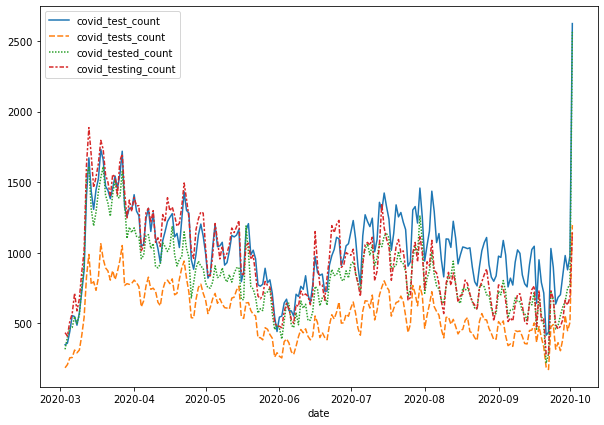

In [11]:
_, ax = plt.subplots(figsize=(10, 7))
new_result = result.set_index("date")
sns.lineplot(data=new_result[["covid_test_count", "covid_tests_count", "covid_tested_count", "covid_testing_count"]], ax=ax)

In [12]:
result['covid_test_count'] += result['covid_tested_count'] + result['covid_testing_count'] + result['covid_tests_count']

Similarly, we observe very close trends in covid_mask_count and covid_masks_count, so we takes their sum to replace the original data for covid_mask_count. 

<AxesSubplot:xlabel='date'>

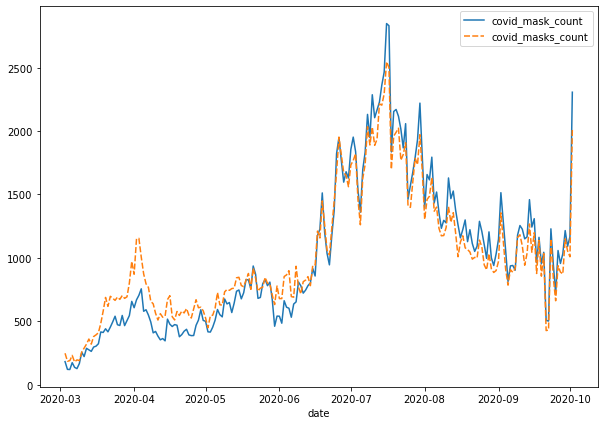

In [13]:
_, ax4 = plt.subplots(figsize=(10, 7))
sns.lineplot(data=new_result[["covid_mask_count", "covid_masks_count"]], ax=ax4)

In [14]:
result['covid_mask_count'] += result['covid_masks_count']

For keywords "covid+vaccine" and "covid+vaccines", we observe that the trend in covid_vaccine_count is more characteristic, so we take their sum to update covid_vaccine_count.

<AxesSubplot:xlabel='date'>

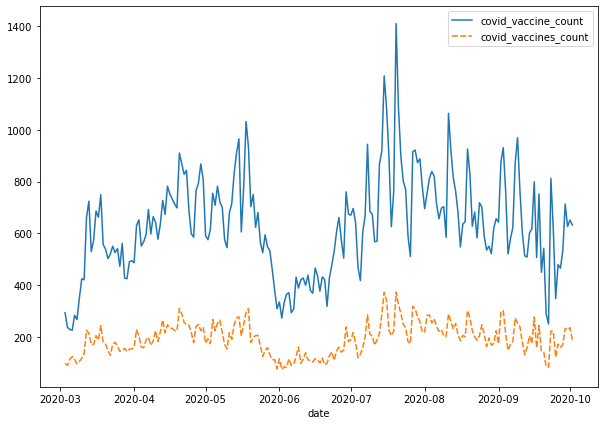

In [15]:
_, ax2 = plt.subplots(figsize=(10, 7))
sns.lineplot(data=new_result[["covid_vaccine_count", "covid_vaccines_count"]], ax=ax2)

In [16]:
result['covid_vaccine_count'] += result['covid_vaccines_count']

Similarly, covid_job_count is more representative, so we take their sum to replace covid_job_count.

<AxesSubplot:xlabel='date'>

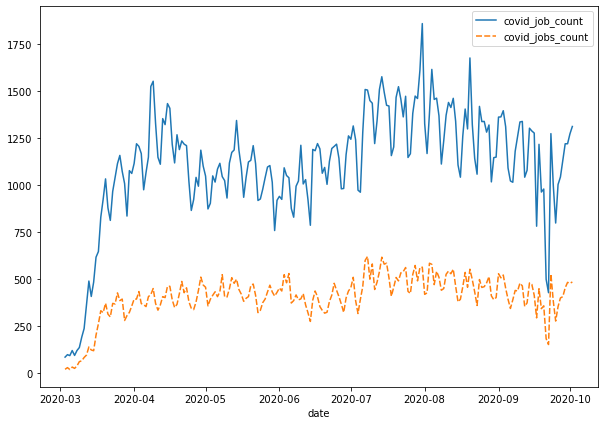

In [17]:
_, ax3 = plt.subplots(figsize=(10, 7))
sns.lineplot(data=new_result[["covid_job_count", "covid_jobs_count"]], ax=ax3)

In [18]:
result['covid_job_count'] += result['covid_jobs_count']

We drop unwanted columns in our `result` DateFrame. 

In [19]:
result = result.drop(columns = ['covid_vaccines_count', 'covid_jobs_count', 'covid_masks_count', 'covid_tested_count', 'covid_testing_count', 'covid_tests_count'])

Finally, we save this updated DataFrame to a new CSV file. 

In [20]:
result.to_csv(r'datasheet.csv', index=False, header=True)

## Appendix:

Below is our data collection code to convert raw json code to formatted csv files.

```python
import json
import urllib.request
import os

KEYWORDS = [
    'covid',
    'covid-19',
    'coronavirus',
    'covid+economy',
    'covid+job',
    'covid+jobs',
    'covid+cash',
    'covid+money',
    'covid+blm',
    'covid+biden',
    'covid+trump',
    'covid+election',
    'covid+china',
    'covid+mask',
    'covid+masks',
    'covid+shutdown',
    'covid+tests',
    'covid+tested',
    'covid+testing',
    'covid+test',
    'covid+sad',
    'covid+depressed',
    'covid+depressing',
    'covid+hopeless',
    'covid+bored',
    'covid+death',
    'covid+fatality',
    'covid+vaccine',
    'covid+vaccines',
    'covid+breath',
    'covid+chills',
    'covid+cough',
    'covid+fatigue',
    'covid+fever',
    'covid+headache',
    'covid+shortness',
    'covid+smell',
    'covid+sore',
    'covid+taste'
]

BASE_URL = 'http://api.pushshift.io/reddit/search/comment/?q={}&after=300d&aggs=created_utc&frequency=day&size=0&sort=asc'

def get_data(base_url, keyword):
    url = base_url.format(keyword)
    data = urllib.request.urlopen(url).read()
    record = data.decode('UTF-8')
    result = json.loads(record)
    result = result.get('aggs').get('created_utc')

    if '+' in keyword:
        file_to_write = keyword.replace('+', '-')
        col_name = keyword.replace('+', '_')
    else:
        file_to_write, col_name = keyword, keyword

    with open(file_to_write + '.csv', 'w+') as f:
        f.write('date,{}\n'.format(col_name + '_count'))
        for line in result:
            f.write(','.join([str(line.get('key')), str(line.get('doc_count'))]))
            f.write('\n')

for keyword in KEYWORDS:
    get_data(BASE_URL, keyword)
```